# Preparation and Data

In [78]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import pandas as pd


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


housing = pd.read_csv("Datasets/housing.csv")
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


housing_with_index = housing.reset_index()
housing_with_index

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


# Description of Data

In [79]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [80]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [81]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Histogram plots of numerical attributes

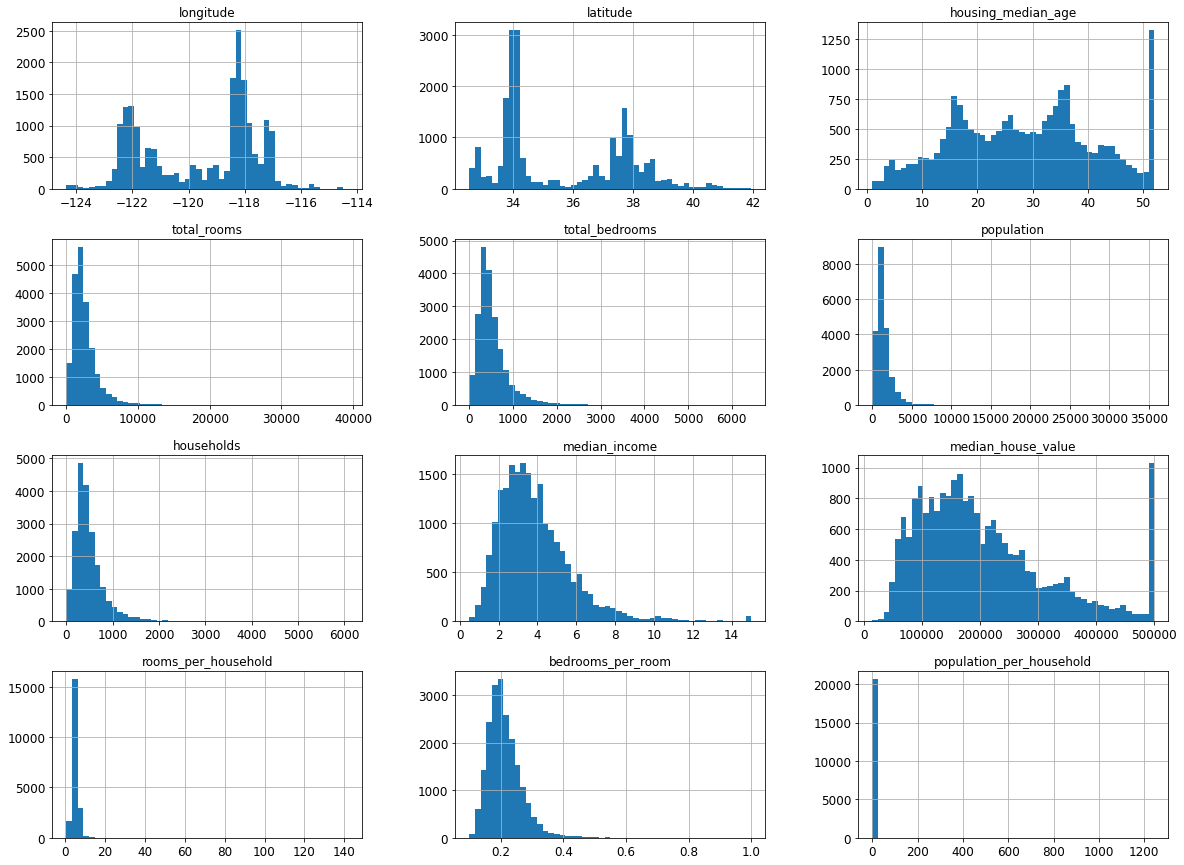

In [82]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

## Note: Median_Income is in 10000s Also may need to transform the tail heavy features

## Creating a training and test sets

In [83]:
import Utils as utils
train_set,test_set = utils.train_test_maker(housing_with_index,0.2)

In [84]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


### Note: sklearn.model_selection.train_test_split can also be used

In [85]:
a = utils.stratum_maker(housing_with_index,"median_income","income_cat",bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

In [86]:
a

0        (6.0, inf]
1        (6.0, inf]
2        (6.0, inf]
3        (4.5, 6.0]
4        (3.0, 4.5]
            ...    
20635    (1.5, 3.0]
20636    (1.5, 3.0]
20637    (1.5, 3.0]
20638    (1.5, 3.0]
20639    (1.5, 3.0]
Name: income_cat, Length: 20640, dtype: category
Categories (5, interval[float64, right]): [(0.0, 1.5] < (1.5, 3.0] < (3.0, 4.5] < (4.5, 6.0] < (6.0, inf]]

<AxesSubplot:>

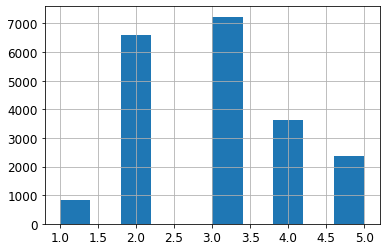

In [87]:
pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5]).hist()

### train and test set should be representative of the median_income feature since it is decided to be an important feature

In [88]:
test_set_strat , train_set_strat = utils.stratified_shuffled_sampling(housing_with_index,"median_income","income_cat",
                                                                     [0., 1.5, 3.0, 4.5, 6., np.inf],[1, 2, 3, 4, 5],1,0.2)
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass test_size=0.2, train_size=42 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [89]:
test_set_strat

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
5852,5852,-118.32,34.17,39.0,1995.0,564.0,1202.0,544.0,3.5875,250000.0,<1H OCEAN,3.667279,0.282707,2.209559,"(3.0, 4.5]"
14991,14991,-117.03,32.73,38.0,3174.0,606.0,1557.0,619.0,3.5861,123600.0,NEAR OCEAN,5.127625,0.190926,2.515347,"(3.0, 4.5]"
8333,8333,-118.31,33.93,37.0,1282.0,244.0,852.0,249.0,4.2917,127900.0,<1H OCEAN,5.148594,0.190328,3.421687,"(3.0, 4.5]"
14547,14547,-117.25,32.94,16.0,4755.0,807.0,1829.0,756.0,6.7694,425900.0,NEAR OCEAN,6.289683,0.169716,2.419312,"(6.0, inf]"
3755,3755,-118.37,34.18,42.0,1140.0,300.0,643.0,252.0,3.3958,178400.0,<1H OCEAN,4.523810,0.263158,2.551587,"(3.0, 4.5]"
13179,13179,-117.76,33.98,3.0,9662.0,1385.0,2497.0,856.0,6.7172,292400.0,<1H OCEAN,11.287383,0.143345,2.917056,"(6.0, inf]"
18071,18071,-122.01,37.28,22.0,2038.0,260.0,773.0,281.0,9.1569,500001.0,<1H OCEAN,7.252669,0.127576,2.750890,"(6.0, inf]"
13406,13406,-117.46,34.09,8.0,4711.0,963.0,3310.0,988.0,3.5488,101600.0,INLAND,4.768219,0.204415,3.350202,"(3.0, 4.5]"
14150,14150,-117.07,32.73,18.0,2968.0,656.0,1149.0,581.0,2.6452,154200.0,NEAR OCEAN,5.108434,0.221024,1.977625,"(1.5, 3.0]"
2664,2664,-123.78,40.05,17.0,2019.0,496.0,899.0,347.0,2.1864,101900.0,<1H OCEAN,5.818444,0.245666,2.590778,"(1.5, 3.0]"


In [90]:
test_set_strat["income_cat"].value_counts()/len(test_set_strat)

(3.0, 4.5]    0.357143
(1.5, 3.0]    0.309524
(4.5, 6.0]    0.166667
(6.0, inf]    0.119048
(0.0, 1.5]    0.047619
Name: income_cat, dtype: float64

In [91]:
for set_ in (train_set_strat,test_set_strat):
    set_.drop("income_cat",axis=1,inplace=True)

In [92]:
test_set_strat

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
5852,5852,-118.32,34.17,39.0,1995.0,564.0,1202.0,544.0,3.5875,250000.0,<1H OCEAN,3.667279,0.282707,2.209559
14991,14991,-117.03,32.73,38.0,3174.0,606.0,1557.0,619.0,3.5861,123600.0,NEAR OCEAN,5.127625,0.190926,2.515347
8333,8333,-118.31,33.93,37.0,1282.0,244.0,852.0,249.0,4.2917,127900.0,<1H OCEAN,5.148594,0.190328,3.421687
14547,14547,-117.25,32.94,16.0,4755.0,807.0,1829.0,756.0,6.7694,425900.0,NEAR OCEAN,6.289683,0.169716,2.419312
3755,3755,-118.37,34.18,42.0,1140.0,300.0,643.0,252.0,3.3958,178400.0,<1H OCEAN,4.523810,0.263158,2.551587
13179,13179,-117.76,33.98,3.0,9662.0,1385.0,2497.0,856.0,6.7172,292400.0,<1H OCEAN,11.287383,0.143345,2.917056
18071,18071,-122.01,37.28,22.0,2038.0,260.0,773.0,281.0,9.1569,500001.0,<1H OCEAN,7.252669,0.127576,2.750890
13406,13406,-117.46,34.09,8.0,4711.0,963.0,3310.0,988.0,3.5488,101600.0,INLAND,4.768219,0.204415,3.350202
14150,14150,-117.07,32.73,18.0,2968.0,656.0,1149.0,581.0,2.6452,154200.0,NEAR OCEAN,5.108434,0.221024,1.977625
2664,2664,-123.78,40.05,17.0,2019.0,496.0,899.0,347.0,2.1864,101900.0,<1H OCEAN,5.818444,0.245666,2.590778


### Always a good practice to work on a copy of training set

In [93]:
housing_train = train_set_strat.copy()

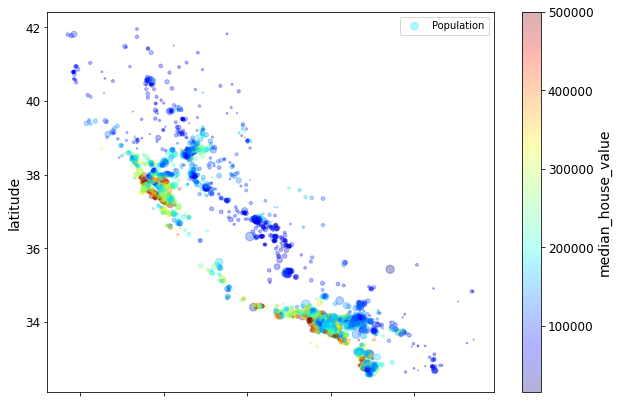

In [94]:
housing_train.plot(kind="scatter",x="longitude",y="latitude",alpha=0.3,
                  s = housing_train["population"]/100,label="Population",figsize=(10,7),
                  c = "median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

### from the above it seems that housing prices are related to population and location

#### Correlation between features

In [95]:
corr_matrix = housing_train.corr()

In [96]:
corr_matrix

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
index,1.000000,-0.137410,0.105520,-0.173288,0.066338,0.024970,0.014024,0.020468,0.074764,0.057965,0.050439,-0.121174,0.021401
longitude,-0.137410,1.000000,-0.926346,-0.118672,0.036083,0.077789,0.105744,0.063616,-0.037019,-0.047037,-0.040444,0.118795,-0.013464
latitude,0.105520,-0.926346,1.000000,0.023684,-0.034959,-0.084132,-0.122012,-0.089603,-0.060332,-0.145279,0.127071,-0.138984,0.016409
housing_median_age,-0.173288,-0.118672,0.023684,1.000000,-0.381812,-0.313806,-0.298767,-0.294289,-0.120314,0.112708,-0.173296,0.147853,0.022605
total_rooms,0.066338,0.036083,-0.034959,-0.381812,1.000000,0.912698,0.830285,0.903571,0.200898,0.149964,0.150982,-0.176926,-0.029080
total_bedrooms,0.024970,0.077789,-0.084132,-0.313806,0.912698,1.000000,0.864920,0.980053,-0.027841,0.066161,-0.010886,0.122295,-0.030631
population,0.014024,0.105744,-0.122012,-0.298767,0.830285,0.864920,1.000000,0.895420,-0.014249,-0.023325,-0.104653,0.078824,0.115249
households,0.020468,0.063616,-0.089603,-0.294289,0.903571,0.980053,0.895420,1.000000,-0.004048,0.080176,-0.107411,0.102761,-0.030259
median_income,0.074764,-0.037019,-0.060332,-0.120314,0.200898,-0.027841,-0.014249,-0.004048,1.000000,0.685401,0.344591,-0.590818,0.051084
median_house_value,0.057965,-0.047037,-0.145279,0.112708,0.149964,0.066161,-0.023325,0.080176,0.685401,1.000000,0.163092,-0.225782,-0.019897


In [97]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.685401
rooms_per_household         0.163092
total_rooms                 0.149964
housing_median_age          0.112708
households                  0.080176
total_bedrooms              0.066161
index                       0.057965
population_per_household   -0.019897
population                 -0.023325
longitude                  -0.047037
latitude                   -0.145279
bedrooms_per_room          -0.225782
Name: median_house_value, dtype: float64

#### based on correlation median_income,rooms_per_household, total_rooms, population_per_household and bedrooms_per_room have highest correlation with median_house_value

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='median_income', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='rooms_per_household'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_inco

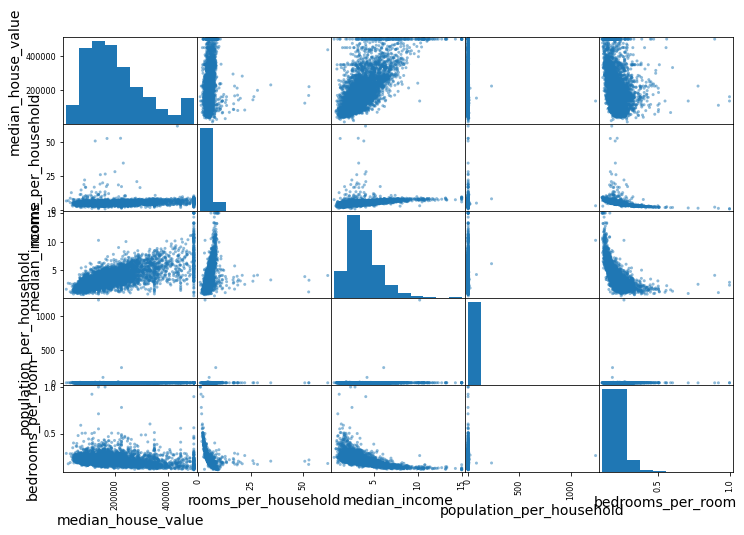

In [98]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","rooms_per_household", "median_income", "population_per_household","bedrooms_per_room"]
scatter_matrix(housing_train[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

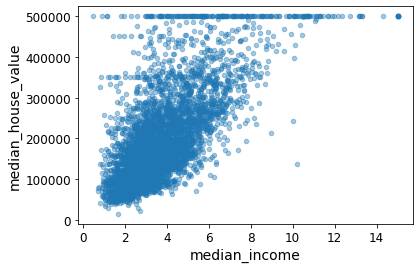

In [99]:
housing_train.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.4)

#### Note horizontal lines at 500k, 450k, 350k (we may need to remove these data) to prevent our algo from reproducing this quirk

In [100]:
housing = train_set_strat.drop("median_house_value",axis=1) # drop() creates a copy of the data and doesn't affect train_set_strat
housing_labels = train_set_strat["median_house_value"].copy()

#### To deal with missing values on individual basis use utils.rectify_missing_vals but in general scikit-learn SimpleImputer can be applied to whole dataset

In [101]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([ 1.05290000e+04, -1.18480000e+02,  3.42500000e+01,  2.90000000e+01,
        2.11200000e+03,  4.30000000e+02,  1.17200000e+03,  4.06000000e+02,
        3.52615000e+00,  5.23669028e+00,  2.03587818e-01,  2.81944242e+00])

In [102]:
X = imputer.transform(housing_num)

In [103]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
20479,20479.0,-118.71,34.28,27.0,2911.0,562.0,1773.0,580.0,4.6528,5.018966,0.193061,3.056897
14810,14810.0,-117.17,32.69,40.0,2236.0,331.0,767.0,316.0,5.3177,7.075949,0.148032,2.427215
16329,16329.0,-121.34,38.02,30.0,4375.0,689.0,2038.0,709.0,5.1202,6.170663,0.157486,2.874471
2039,2039.0,-119.69,36.75,13.0,2343.0,409.0,1347.0,405.0,4.0027,5.785185,0.174563,3.325926
6634,6634.0,-118.16,34.16,52.0,1576.0,239.0,696.0,249.0,6.0700,6.329317,0.151650,2.795181
...,...,...,...,...,...,...,...,...,...,...,...,...
3713,3713.0,-118.40,34.20,30.0,2392.0,655.0,1987.0,609.0,2.8424,3.927750,0.273829,3.262726
20226,20226.0,-119.30,34.29,26.0,3665.0,932.0,2775.0,870.0,1.9286,4.212644,0.254297,3.189655
15948,15948.0,-122.43,37.73,52.0,3602.0,738.0,2270.0,647.0,3.8934,5.567233,0.204886,3.508501
2771,2771.0,-115.90,33.34,19.0,1210.0,248.0,329.0,155.0,1.7857,7.806452,0.204959,2.122581


In [104]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
20479,<1H OCEAN
14810,NEAR OCEAN
16329,INLAND
2039,INLAND
6634,<1H OCEAN
...,...
3713,<1H OCEAN
20226,NEAR OCEAN
15948,NEAR BAY
2771,INLAND


#### we have to convert ocean_proximity from categorical variable to numerical variable

In [105]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0.],
       [4.],
       [1.],
       ...,
       [3.],
       [1.],
       [0.]])

In [106]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### in the above encoding two nearby values are not necessarily more similar that two distant values but ML algorithms will assume otherwise therefore it is better to apply one hot encoding

In [107]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [108]:
housing_tr

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
20479,20479.0,-118.71,34.28,27.0,2911.0,562.0,1773.0,580.0,4.6528,5.018966,0.193061,3.056897
14810,14810.0,-117.17,32.69,40.0,2236.0,331.0,767.0,316.0,5.3177,7.075949,0.148032,2.427215
16329,16329.0,-121.34,38.02,30.0,4375.0,689.0,2038.0,709.0,5.1202,6.170663,0.157486,2.874471
2039,2039.0,-119.69,36.75,13.0,2343.0,409.0,1347.0,405.0,4.0027,5.785185,0.174563,3.325926
6634,6634.0,-118.16,34.16,52.0,1576.0,239.0,696.0,249.0,6.0700,6.329317,0.151650,2.795181
...,...,...,...,...,...,...,...,...,...,...,...,...
3713,3713.0,-118.40,34.20,30.0,2392.0,655.0,1987.0,609.0,2.8424,3.927750,0.273829,3.262726
20226,20226.0,-119.30,34.29,26.0,3665.0,932.0,2775.0,870.0,1.9286,4.212644,0.254297,3.189655
15948,15948.0,-122.43,37.73,52.0,3602.0,738.0,2270.0,647.0,3.8934,5.567233,0.204886,3.508501
2771,2771.0,-115.90,33.34,19.0,1210.0,248.0,329.0,155.0,1.7857,7.806452,0.204959,2.122581


#### We can do all the feature engineering using pipeline

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline for numerical variables
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),
    ('std_scaler',StandardScaler())
])

In [110]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [111]:
housing_num_tr

array([[ 1.68984256,  0.42371601, -0.6318455 , ..., -0.17184851,
        -0.34181316, -0.01215931],
       [ 0.74100526,  1.19249618, -1.37411441, ...,  0.72823538,
        -1.06564198, -0.04415337],
       [ 0.99524478, -0.88920077,  1.11412035, ...,  0.33210502,
        -0.913678  , -0.02142834],
       ...,
       [ 0.93147568, -1.43333738,  0.97873797, ...,  0.06805959,
        -0.1517219 ,  0.01078666],
       [-1.2739978 ,  1.82649021, -1.07067114, ...,  1.04788461,
        -0.15055642, -0.05963183],
       [ 0.85281039,  1.20248033, -1.15470159, ..., -0.07135807,
        -0.18965631, -0.01443264]])

#### Better option is to use ColumnTransformer from sklearn.compose

In [112]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline, num_attribs),
    ("cat",OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

#### Now after preprocessing is done let's train a linear regression on the data and try it on some points in training set

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [114]:
some_points = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
points_prepared = full_pipeline.transform(some_points)
print("Predictions: ",lin_reg.predict(points_prepared))

Predictions:  [255916.8408299  298235.14336237 212343.06628998 117438.19416764
 318487.73306109]


In [115]:
print("Labels: ",list(some_labels))

Labels:  [186600.0, 500001.0, 133800.0, 93100.0, 261800.0]


In [116]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

66759.48334519102

#### Now let's compare the result with a decision tree regressor

In [117]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions,housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Now let's train using cross validation method

In [118]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

#### Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

In [119]:
tree_rmse_scores

array([70412.37149885, 69705.91546894, 77119.08829981, 77362.17322151,
       71353.77578102, 87565.10799173, 74012.77156031, 66570.17824458,
       74110.60251329, 74915.77042443])

In [120]:
import joblib
joblib.dump(tree_reg,"my_tree.pkl")

['my_tree.pkl']

In [121]:
# to load
tree_reg = joblib.load("my_tree.pkl")

In [122]:
tree_reg

DecisionTreeRegressor()

#### Grid searching the hyperparameter space

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
              {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [124]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [125]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [126]:
curves = grid_search.cv_results_

In [127]:
for mean_score,params in zip(curves["mean_test_score"],curves["params"]):
    print(np.sqrt(-mean_score),params)

67219.41663219154 {'max_features': 2, 'n_estimators': 3}
57426.098262038824 {'max_features': 2, 'n_estimators': 10}
54788.10429675668 {'max_features': 2, 'n_estimators': 30}
63110.27515849782 {'max_features': 4, 'n_estimators': 3}
56035.45933469465 {'max_features': 4, 'n_estimators': 10}
52509.05684762585 {'max_features': 4, 'n_estimators': 30}
61100.08859263922 {'max_features': 6, 'n_estimators': 3}
54486.82209389784 {'max_features': 6, 'n_estimators': 10}
52144.29779426731 {'max_features': 6, 'n_estimators': 30}
61255.252882433924 {'max_features': 8, 'n_estimators': 3}
54612.16555650907 {'max_features': 8, 'n_estimators': 10}
52590.804270742025 {'max_features': 8, 'n_estimators': 30}
65686.1267036716 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56806.83078369637 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61689.26538445257 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53985.618872117084 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [128]:
grid_search.cv_results_

{'mean_fit_time': array([0.01584787, 0.04873905, 0.14458218, 0.02064681, 0.06651773,
        0.20477624, 0.02745185, 0.0871048 , 0.27063656, 0.03444018,
        0.13542571, 0.3897562 , 0.02172236, 0.07193632, 0.02787409,
        0.09361143, 0.03148241, 0.10996046]),
 'std_fit_time': array([0.0011574 , 0.00413085, 0.00489885, 0.00132273, 0.00255743,
        0.00584656, 0.00207374, 0.00402618, 0.01036845, 0.00131414,
        0.01707609, 0.01687604, 0.00147197, 0.00501426, 0.0013113 ,
        0.00595925, 0.00066769, 0.00356059]),
 'mean_score_time': array([0.00145793, 0.00317841, 0.00722246, 0.00131292, 0.00259962,
        0.00664492, 0.00129638, 0.00271516, 0.00762396, 0.00170574,
        0.00333643, 0.00802698, 0.00186496, 0.0036726 , 0.00193129,
        0.00391178, 0.00136304, 0.00356693]),
 'std_score_time': array([1.71460591e-04, 8.88270164e-04, 2.97713210e-04, 8.04238419e-05,
        1.75776600e-04, 2.34672073e-04, 1.61742264e-04, 1.66542803e-04,
        1.08640369e-03, 3.12056445e-

In [129]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
attributes

['index',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [130]:
sorted(zip(feature_importances,attributes),reverse=True)

[(0.34574128277953114, 'median_income'),
 (0.14887261989869602, 'INLAND'),
 (0.10491613247369597, 'population_per_household'),
 (0.06227265443378804, 'bedrooms_per_room'),
 (0.05874895400266369, 'rooms_per_household'),
 (0.05865577306451811, 'latitude'),
 (0.05538335103671783, 'longitude'),
 (0.04828169039911692, 'index'),
 (0.03725724270311178, 'housing_median_age'),
 (0.016740228220193786, 'total_rooms'),
 (0.016147042743037594, 'total_bedrooms'),
 (0.01522823026507713, 'population'),
 (0.014420340006767165, 'households'),
 (0.011442971427123326, '<1H OCEAN'),
 (0.00303323224843302, 'NEAR BAY'),
 (0.0028397760360561733, 'NEAR OCEAN'),
 (1.8478261472438687e-05, 'ISLAND')]

#### when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV

In [131]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
              {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]
forest_reg = RandomForestRegressor()
grid_search = RandomizedSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [132]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [133]:
grid_search.cv_results_

{'mean_fit_time': array([0.03360672, 0.0489377 , 0.02022128, 0.0784904 , 0.03198476,
        0.09869676, 0.11732349, 0.3058023 , 0.02256384, 0.01657495]),
 'std_fit_time': array([0.00220051, 0.00083235, 0.0014153 , 0.0026881 , 0.00071662,
        0.0017482 , 0.00795066, 0.01647268, 0.0006023 , 0.00074725]),
 'mean_score_time': array([0.00234246, 0.0028769 , 0.0015358 , 0.00305409, 0.00122876,
        0.00304737, 0.00301795, 0.00786633, 0.00146723, 0.00157743]),
 'std_score_time': array([1.02245563e-03, 1.58648431e-04, 1.48641898e-04, 1.86589457e-04,
        6.45895953e-05, 2.26236022e-04, 2.72975484e-04, 6.88425601e-04,
        1.46289957e-04, 8.45543213e-05]),
 'param_n_estimators': masked_array(data=[3, 10, 3, 10, 3, 10, 10, 30, 3, 3],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[4, 2, 2, 3, 8, 4, 8, 6, 4, 2],
              ma

In [134]:
for mean_test_score,param in zip(grid_search.cv_results_["mean_test_score"],grid_search.cv_results_["params"]):
    print(np.sqrt(-mean_test_score),param)

61272.924567537644 {'n_estimators': 3, 'max_features': 4, 'bootstrap': False}
57631.31752026202 {'n_estimators': 10, 'max_features': 2}
64138.02662656429 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
54729.23499009083 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
61668.10746408781 {'n_estimators': 3, 'max_features': 8}
54466.41770315762 {'n_estimators': 10, 'max_features': 4, 'bootstrap': False}
55190.0451304163 {'n_estimators': 10, 'max_features': 8}
52019.804977590786 {'n_estimators': 30, 'max_features': 6}
63203.12720017748 {'n_estimators': 3, 'max_features': 4}
66661.48042071745 {'n_estimators': 3, 'max_features': 2}


#### Now it is time to evaluate our model on test set (remember we dont' want to train our model on test set)

In [135]:
final_model = grid_search.best_estimator_
X_test = test_set_strat.drop("median_house_value",axis=1)
y_test = test_set_strat["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test) ## transform NOT fit_transform
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [136]:
final_rmse

53260.868745223255

#### Computing 95% confidence interval for the generalization error

In [137]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                               loc = squared_errors.mean(),
                               scale = stats.sem(squared_errors)))

array([37092.52112522, 65555.96964096])

#### Let's try SVM onthis dataset

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   0.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.5s
[CV] END .............................C=100.0, kernel=linear; total time=   0.6s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [139]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

68622.04193881775

In [140]:
grid_search.best_params_

{'C': 3000.0, 'kernel': 'linear'}

In [141]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
    'kernel': ['linear','rbf'],
    'C': reciprocal(20,200),
    'gamma': expon(scale=1.0),
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg,param_distribs,n_iter=10,cv=5,scoring='neg_mean_squared_error',verbose=3,random_state=42)
rnd_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=47.37727900728156, gamma=3.010121430917521, kernel=linear;, score=-5588634609.102 total time=   0.6s
[CV 2/5] END C=47.37727900728156, gamma=3.010121430917521, kernel=linear;, score=-6375038239.699 total time=   0.5s
[CV 3/5] END C=47.37727900728156, gamma=3.010121430917521, kernel=linear;, score=-7443457423.178 total time=   0.5s
[CV 4/5] END C=47.37727900728156, gamma=3.010121430917521, kernel=linear;, score=-7162245731.310 total time=   0.5s
[CV 5/5] END C=47.37727900728156, gamma=3.010121430917521, kernel=linear;, score=-6250172647.421 total time=   0.5s
[CV 1/5] END C=120.42620370295205, gamma=0.9084469696321253, kernel=rbf;, score=-12909197906.447 total time=   0.9s
[CV 2/5] END C=120.42620370295205, gamma=0.9084469696321253, kernel=rbf;, score=-13827676503.454 total time=   0.9s
[CV 3/5] END C=120.42620370295205, gamma=0.9084469696321253, kernel=rbf;, score=-14923937594.548 total time=   0.9s
[CV 4/5] EN

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f81210343a0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8121034910>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [142]:
rnd_search.best_params_

{'C': 47.37727900728156, 'gamma': 3.010121430917521, 'kernel': 'linear'}

In [143]:
np.sqrt(-rnd_search.best_score_)

81017.95930620663

#### Let's add a transformer to select only the most important attributes

In [149]:
from sklearn.base import BaseEstimator,TransformerMixin

def indices_of_top_k(arr,k):
    return np.sort(np.argpartition(np.array(arr),-k)[-k:])

class TopFeatureSelector(BaseEstimator,TransformerMixin):
    def __init__(self,feature_importances,k):
        self.feature_importances = feature_importances
        self.k = k
    
    def fit(self,X,y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances,self.k)
        return self
    
    def transform(self,X):
        return X[:,self.feature_indices_]

In [150]:
k = 10
top_k_feature_indices = indices_of_top_k(feature_importances,k)

In [151]:
np.array(attributes)[top_k_feature_indices]

array(['index', 'longitude', 'latitude', 'housing_median_age',
       'total_rooms', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household', 'INLAND'],
      dtype='<U24')

In [153]:
sorted(zip(feature_importances,attributes),reverse=True)[:k]

[(0.34574128277953114, 'median_income'),
 (0.14887261989869602, 'INLAND'),
 (0.10491613247369597, 'population_per_household'),
 (0.06227265443378804, 'bedrooms_per_room'),
 (0.05874895400266369, 'rooms_per_household'),
 (0.05865577306451811, 'latitude'),
 (0.05538335103671783, 'longitude'),
 (0.04828169039911692, 'index'),
 (0.03725724270311178, 'housing_median_age'),
 (0.016740228220193786, 'total_rooms')]

In [154]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation',full_pipeline),
    ('feature_selection',TopFeatureSelector(feature_importances,k))
])

In [155]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [156]:
housing_prepared_top_k_features[0:3]

array([[ 1.68984256,  0.42371601, -0.6318455 , -0.13984546,  0.14420673,
         0.41737725, -0.17184851, -0.34181316, -0.01215931,  0.        ],
       [ 0.74100526,  1.19249618, -1.37411441,  0.89742707, -0.19282215,
         0.76894223,  0.72823538, -1.06564198, -0.04415337,  0.        ],
       [ 0.99524478, -0.88920077,  1.11412035,  0.09952512,  0.87518492,
         0.66451437,  0.33210502, -0.913678  , -0.02142834,  1.        ]])

In [157]:
housing_prepared[0:3,top_k_feature_indices]

array([[ 1.68984256,  0.42371601, -0.6318455 , -0.13984546,  0.14420673,
         0.41737725, -0.17184851, -0.34181316, -0.01215931,  0.        ],
       [ 0.74100526,  1.19249618, -1.37411441,  0.89742707, -0.19282215,
         0.76894223,  0.72823538, -1.06564198, -0.04415337,  0.        ],
       [ 0.99524478, -0.88920077,  1.11412035,  0.09952512,  0.87518492,
         0.66451437,  0.33210502, -0.913678  , -0.02142834,  1.        ]])